## Data Visualization of Charging Stations in Indian Highways/Expressways

### Importing the Libraries 

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
%pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score

### Reading and Exploring the Dataframe 

In [16]:
charging_station = pd.read_excel("ChargingStation-Preprocessed.xlsx"
)

In [34]:
charging_station

,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,Expressways,Mumbai - Pune,10
1,Expressways,Ahmadabad - Vadodara,10
2,Expressways,Delhi Agra Yamuna,20
3,Expressways,Bengaluru Mysore,14
4,Expressways,Bangaluru-Chennai,30
5,Expressways,Surat-Mumbai,30
6,Expressways,Agra-Lucknow,40
7,Expressways,Eastern Peripheral (A),14
8,Expressways,Hyderabad ORR,16
9,Highways,Delhi - Srinagar,80


In [18]:
charging_station.isnull().sum()

Category                           0
Expressways/Highways               0
EV Charging Stations Sanctioned    0
dtype: int64

In [9]:
#removing the row conatinting the total
charging_station.drop([25],inplace=True)

KeyError: '[25] not found in axis'

In [19]:
charging_station.tail()

,Category,Expressways/Highways,EV Charging Stations Sanctioned
20,Highways,Chennai-Bhubaneswar,120
21,Highways,Chennai - Trivendram,74
22,Highways,Chennai-Ballary,62
23,Highways,Chennai - Nagpur,114
24,Highways,Mangaldai - Wakro,64


In [20]:
#sorting the dataframe according to Expresss_way
charging_station_sorted_1 = charging_station.sort_values("Expressways/Highways")

In [21]:
charging_station_sorted_1.head()

,Category,Expressways/Highways,EV Charging Stations Sanctioned
11,Highways,Agra - Nagpur,80
6,Expressways,Agra-Lucknow,40
1,Expressways,Ahmadabad - Vadodara,10
4,Expressways,Bangaluru-Chennai,30
3,Expressways,Bengaluru Mysore,14


In [ ]:
#sorting the dataframe according to Charging Station
charging_station_sorted_2 = charging_station.sort_values("EV Charging Stations Sanctioned")

In [ ]:
charging_station_sorted_2.head()

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,10
1,2,Expressways,Ahmadabad - Vadodara,10
3,4,Expressways,Bengaluru Mysore,14
7,8,Expressways,Eastern Peripheral (A),14
8,9,Expressways,Hyderabad ORR,16


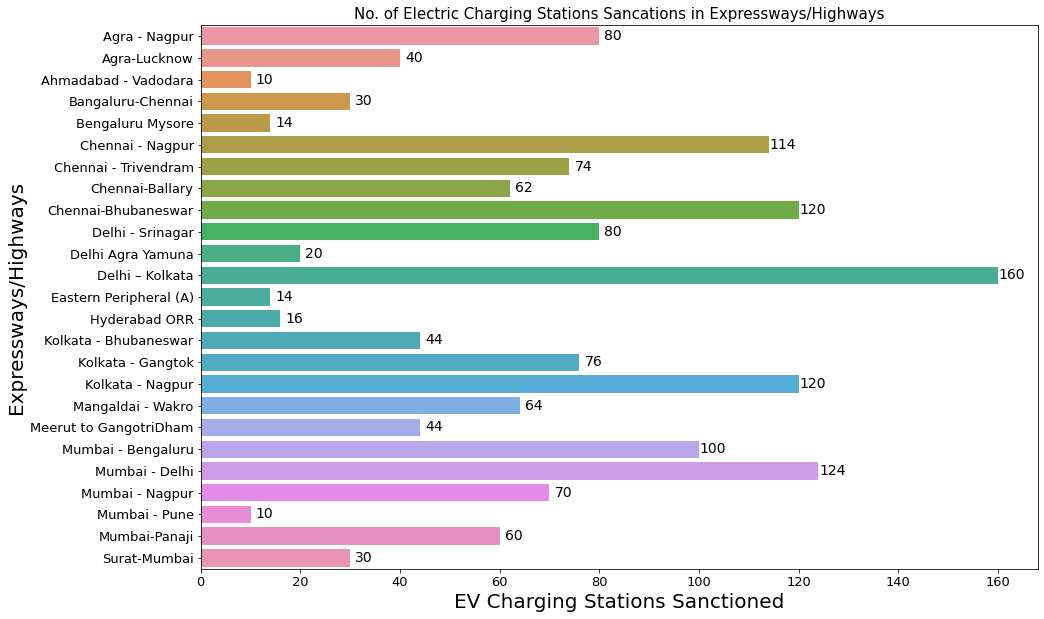

In [22]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x="EV Charging Stations Sanctioned",y="Expressways/Highways",data=charging_station_sorted_1)
for p in ax.patches:
    width = p.get_width()
    plt.text(2.8+p.get_width(), p.get_y()+0.5*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center',
            size= 14)
    
    
plt.xticks(size= 13)
plt.yticks(size=13)
plt.ylabel("Expressways/Highways", size=20)
plt.xlabel("EV Charging Stations Sanctioned" ,size=20)
plt.title ("No. of Electric Charging Stations Sancations in Expressways/Highways" , size=15)
plt.show()

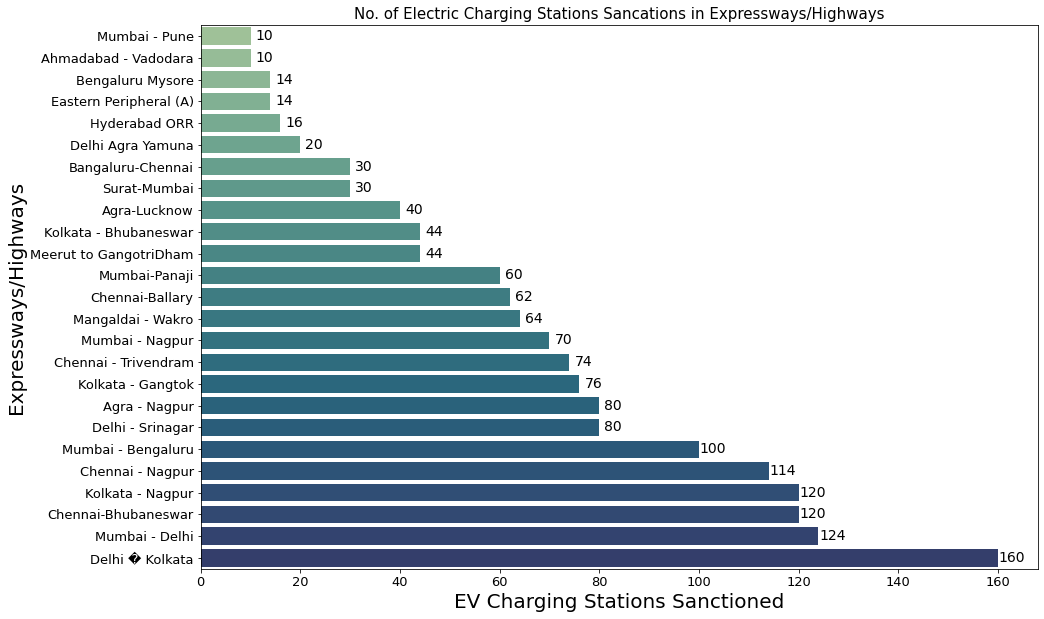

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x="EV Charging Stations Sanctioned",y="Expressways/Highways",data=charging_station_sorted_2,palette="crest")
for p in ax.patches:
    width = p.get_width()
    plt.text(2.8+p.get_width(), p.get_y()+0.5*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center',
            size= 14)
    
    
plt.xticks(size= 13)
plt.yticks(size=13)
plt.ylabel("Expressways/Highways", size=20)
plt.xlabel("EV Charging Stations Sanctioned" ,size=20)
plt.title ("No. of Electric Charging Stations Sancations in Expressways/Highways" , size=15)
plt.show()

## Data Visualization of Electric Vehicle in India

In [24]:
#Reading the EV India Dataset
ev_india = pd.read_excel("EVIndia-Preprocessed.xlsx")

In [25]:
ev_india.head()

,Car,Style,Range,PriceRange,Capacity,BootSpace
0,Tata Nexon EV,Compact SUV,312,1569500,5,350.000
1,Tata Tigor EV,Subcompact Sedan,306,1306500,5,316.000
2,Tata Nexon EV Max,Compact SUV,437,1849000,5,350.000
3,MG ZS EV,Compact SUV,419,2393500,5,448.000
4,Hyundai Kona Electric,Compact SUV,452,2388500,5,470.625


In [26]:
ev_india.isnull().sum()

Car           0
Style         0
Range         0
PriceRange    0
Capacity      0
BootSpace     0
dtype: int64

In [27]:
#sorting the dataset as per our first graph
ev_india_sorted = ev_india.sort_values("PriceRange")

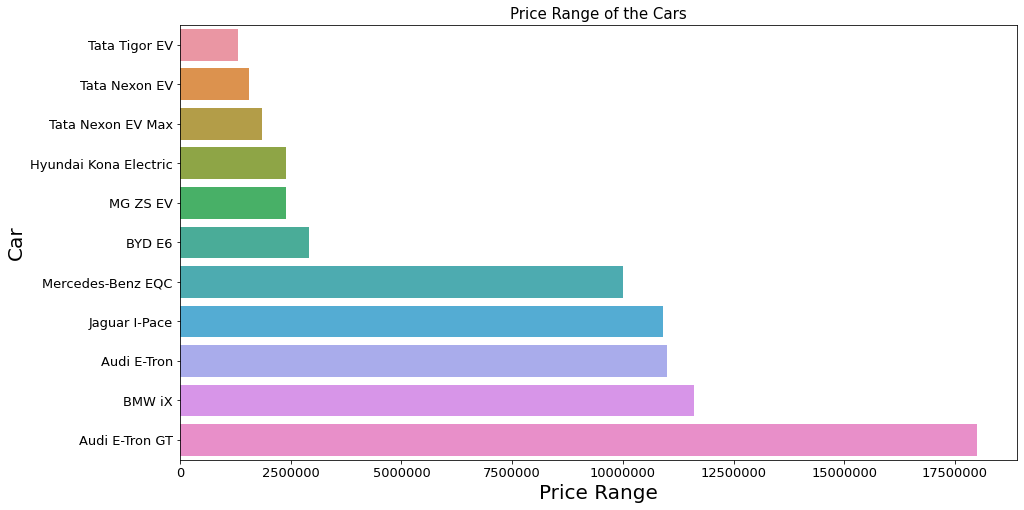

In [28]:
#Plotting the Car vs Price Range Graph
plt.figure(figsize=(15,8))

ax = sns.barplot(x="PriceRange",y="Car",data=ev_india_sorted)

    
plt.xticks(size= 13)
plt.ticklabel_format(style='plain', axis='x')
plt.yticks(size=13)
plt.ylabel("Car", size=20)
plt.xlabel("Price Range" ,size=20)
plt.title ("Price Range of the Cars" , size=15)
plt.show()

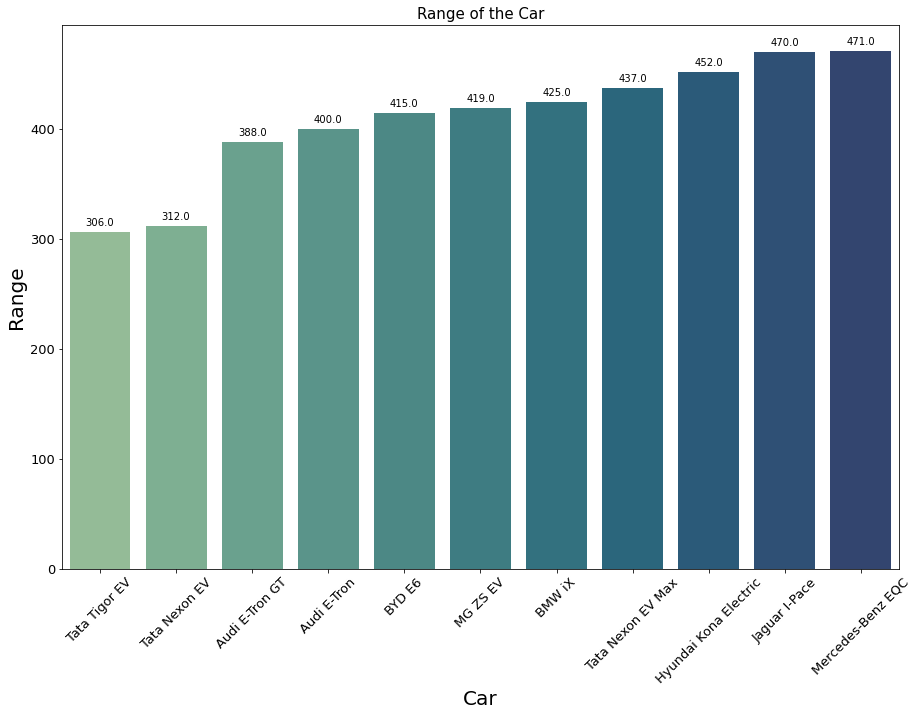

In [ ]:
#Plottong the Car vs Range Graph
ev_india_range = ev_india.sort_values("Range")

plt.figure(figsize=(15,10))

ax = sns.barplot(x="Car",y="Range",data=ev_india_range,palette="crest")

for p in ax.patches:
    ax.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
    
plt.xticks(rotation= 45,size= 13)
plt.yticks(size=13)
plt.ylabel("Range", size=20)
plt.xlabel("Car" ,size=20)
plt.title ("Range of the Car" , size=15)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Tata Nexon EV'),
  Text(1, 0, 'Tata Tigor EV'),
  Text(2, 0, 'Tata Nexon EV Max'),
  Text(3, 0, 'MG ZS EV'),
  Text(4, 0, 'Hyundai Kona Electric'),
  Text(5, 0, 'Jaguar I-Pace'),
  Text(6, 0, 'Audi E-Tron GT'),
  Text(7, 0, 'BYD E6'),
  Text(8, 0, 'Mercedes-Benz EQC'),
  Text(9, 0, 'BMW iX'),
  Text(10, 0, 'Audi E-Tron')])

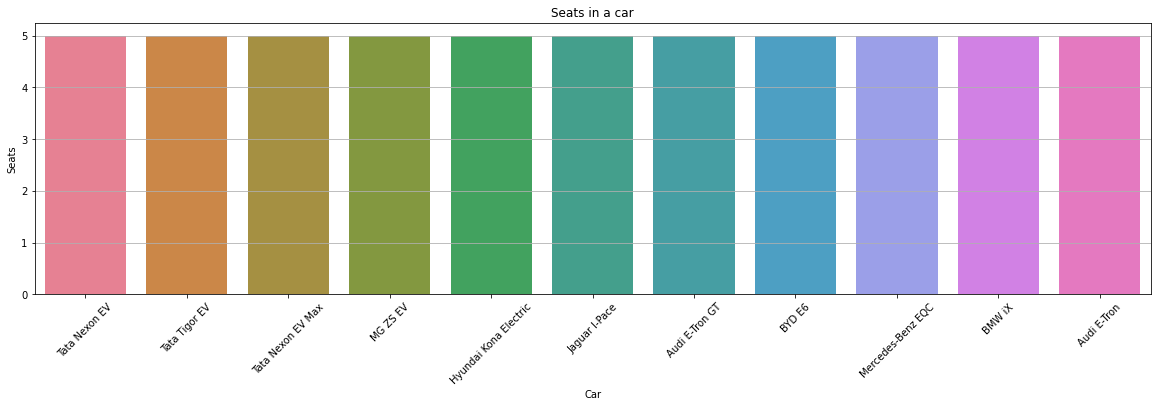

In [55]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Car',y='Capacity',data=ev_india,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Car')
plt.ylabel('Seats')
plt.xticks(rotation=45)

Clustering


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=365)